In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine=create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
data=session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date < '2017-08-23').\
        filter(Measurement.date > '2016-08-23').\
        order_by(Measurement.date).all()
data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(data, columns=['date','prcp'])
df=df.set_index('date')
# Sort the dataframe by date
sort_precip=df.groupby(['date'])

sort_precip.count().head()

,prcp
date,
2016-08-24,6
2016-08-25,7
2016-08-26,6
2016-08-27,5
2016-08-28,6


In [84]:
index=sort_precip.groups.keys()
date=[]
for x in index:
    date=x
    #print(date)

TypeError: unhashable type: 'numpy.ndarray'

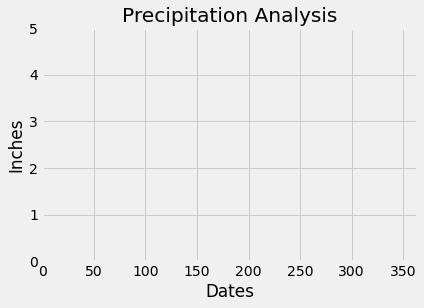

In [154]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(0, len(sort_precip))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Precipitation Analysis")
plt.xlabel("Dates")
plt.ylabel("Inches")

plt.xlim(-0.75, len(sort_precip)-.25)
plt.ylim(0, 5)

plt.bar(x_axis, sort_precip['prcp'], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, sort_precip)
plt.show()

In [86]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [13]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Design a query to calculate the total number stations in the dataset
tot_num_stations=session.query(Station.id).count()
tot_num_stations

9

In [21]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281')
highest_temp=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281')
avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281')


In [138]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
active_precip_data=session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date < '2017-08-18').\
    filter(Measurement.date > '2016-08-18').\
    order_by(Measurement.date).all()
active_precip_data

[(79.0, '2016-08-19'),
 (81.0, '2016-08-20'),
 (79.0, '2016-08-21'),
 (78.0, '2016-08-22'),
 (77.0, '2016-08-23'),
 (77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '20

In [147]:
active_precip_data=pd.DataFrame(active_precip_data)
active_precip_data

,tobs,date
0,79.0,2016-08-19
1,81.0,2016-08-20
2,79.0,2016-08-21
3,78.0,2016-08-22
4,77.0,2016-08-23
...,...,...
350,77.0,2017-08-13
351,77.0,2017-08-14
352,77.0,2017-08-15
353,76.0,2017-08-16


Text(0.5, 0, 'Temperature')

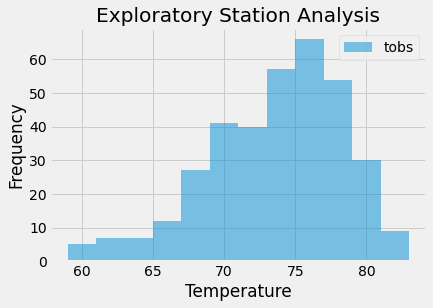

In [150]:
#plot the results as a histogram

active_precip_data.plot.hist(bins=12, alpha=0.5)
plt.title("Exploratory Station Analysis")
plt.xlabel("Temperature")


# Close session

In [155]:
# Close Session
session.close()